In [32]:
import numpy as np
import matplotlib.pyplot as plt
import dijkstra as D
import bellman_ford as BF
import time

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
M = 20
N = 20
thresh = 0.7
aMap = np.random.random((M,N))
ind1 = aMap >= thresh
aMap[ind1] = np.ones(np.sum(ind1))
ind0 = aMap < thresh
aMap[ind0] = np.zeros(np.sum(ind0))

start = (0,0)
goal = (M-1,N-1)

fullPath,minD = D.dijkstra(aMap,start,goal)
print('minD = '+str(minD))

tS_ucs = time.clock()
fullPath_ucs,minD_ucs,explored_ucs = D.dijkstra_ucs(aMap,start,goal)
print('tE_ucs = '+str(time.clock()-tS_ucs))
print('minD_ucs = '+str(minD_ucs))

fullPath_Astar,minD_Astar,explored_Astar = D.Astar(aMap,start,goal)
print('minD_Astar = '+str(minD_Astar))

fullPath_bf,minD_bf = BF.bellman_ford(aMap,start,goal)
print('minD_bf = '+str(minD_bf))

minD = 28.627416998
tE_ucs = 0.03125
minD_ucs = 28.627416998
minD_Astar = 28.627416998
minD_bf = 28.627416998


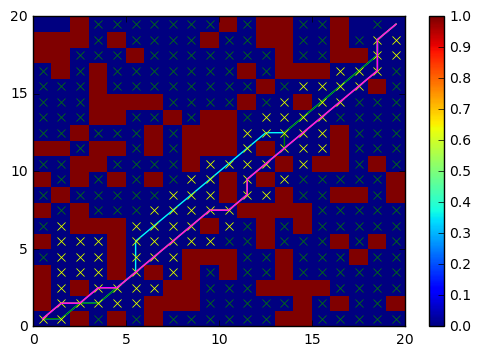

In [34]:
fig,ax = plt.subplots()
im = plt.pcolormesh(aMap)
plt.autoscale(True,'both',True)
fig.colorbar(im,ax=ax)

# dijkstra
x = []
y = []
for node in fullPath:
    y.append(node[0]+0.5)
    x.append(node[1]+0.5)
plt.plot(x,y,color='cyan')

# ucs
x = []
y = []
for node in fullPath_ucs:
    y.append(node[0]+0.5)
    x.append(node[1]+0.5)
plt.plot(x,y,color='green')
x = []
y = []
for node in explored_ucs:
    y.append(node[0]+0.5)
    x.append(node[1]+0.5)
plt.plot(x,y,color='green',marker='x',linestyle='None')

# A*
x = []
y = []
for node in fullPath_Astar:
    y.append(node[0]+0.5)
    x.append(node[1]+0.5)
plt.plot(x,y,color='yellow')
x = []
y = []
for node in explored_Astar:
    y.append(node[0]+0.5)
    x.append(node[1]+0.5)
plt.plot(x,y,color='yellow',marker='x',linestyle='None')

# Bellman-Ford
x = []
y = []
for node in fullPath_Astar:
    y.append(node[0]+0.5)
    x.append(node[1]+0.5)
plt.plot(x,y,color='magenta')

plt.show()